In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.metrics import mean_absolute_error
from solar_forecasting.data_sources.get_data import download_file
from transform_output_format import get_2D_output, get_4D_output

In [7]:
data = np.load('../raw_data/baseline.npz', allow_pickle=True)

In [8]:
data.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [9]:
# Importing features
DATE = data['datetime']
GHI = data['GHI']#[:300]
CLS = data['CLS']#[:300]
SZA = data['SZA']#[:300]
SAA = data['SAA']#[:300]

In [10]:
# Checking if values are np.float64 and appending values to use later in df format

total_ghi = 0
stat_ghi = []

for x in range(GHI.shape[0]):
    for y in range(GHI.shape[1]):
        for z in range(GHI.shape[2]):
            for t in range(GHI.shape[3]):
                stat_ghi.append(GHI[x,y,z,t])
                if type(GHI[x,y,z,t]) != np.float64:
                    total_ghi+=1
total_ghi

0

In [11]:
# CLS

total_cls = 0
stat_cls = []

for x in range(CLS.shape[0]):
    for y in range(CLS.shape[1]):
        for z in range(CLS.shape[2]):
            for t in range (CLS.shape[3]):
                stat_cls.append(CLS[x,y,z,t])
                if type(CLS[x,y,z,t]) != np.float64:
                    total_cls+=1
total_cls

0

In [14]:
# SZA

total_sza = 0
stat_sza = []

for x in range(SZA.shape[0]):
    for y in range(SZA.shape[1]):
        for z in range(SZA.shape[2]):
            for t in range(SZA.shape[3]):
                stat_sza.append(SZA[x,y,z,t])
                if type(SZA[x,y,z,t]) != np.float64:
                    total_sza+=1
total_sza

0

In [12]:
# SAA

total_saa = 0
stat_saa = []

for x in range(SAA.shape[0]):
    for y in range(SAA.shape[1]):
        for z in range(SAA.shape[2]):
            for t in range(SAA.shape[3]):
                stat_saa.append(SAA[x,y,z,t])
                if type(SAA[x,y,z,t]) != np.float64:
                    total_saa+=1
total_saa

0

In [15]:
# Create feature dataframes

df_ghi = pd.DataFrame(stat_ghi, columns=['GHI'])
df_cls = pd.DataFrame(stat_cls, columns=['CLS'])
df_sza = pd.DataFrame(stat_sza, columns=['SZA'])
df_saa = pd.DataFrame(stat_saa, columns=['SAA'])

In [16]:
# Create lagged dataset

lagged_ghi = pd.concat([df_ghi.shift(1), df_ghi], axis=1)
lagged_ghi.columns = ['t-1', 't+1']
lagged_ghi.head(5)

,t-1,t+1
0,NaN,88.29
1,88.29,88.66
2,88.66,89.00
3,89.00,89.38
4,89.38,89.68


In [17]:
# Loading training and testing dataset from challenge website

X_train = np.load('../raw_data/X_train_copernicus.npz', allow_pickle = True)
X_test = np.load('../raw_data/X_test_copernicus.npz')
y_train = pd.read_csv('../raw_data/y_train_zRvpCeO_nQsYtKN.csv')

In [18]:
# Converted y_train(df), a vector, into a matrix
y_train_df = get_4D_output(y_train)
y_train_df.shape

(1845, 4, 51, 51)

In [19]:
# We want to add a layer that is identical to the previous layer to make a dummy model dataset

#Create temporary variable that will equal new layer
_ = np.expand_dims(X_train['GHI'][0][3], axis = 0)

# Checking structure of where we are
print(np.shape(X_train['GHI'][0]))
print(np.shape(_))

# Stacking new layer onto original array
_new_layer = np.vstack((X_train['GHI'][0], _))

# Double checking that new layer was added
print(np.shape(_new_layer))
print(np.shape(_new_layer[0]))

# Checking the contents
print(_new_layer[2] - _new_layer[4])

(4, 81, 81)
(1, 81, 81)
(5, 81, 81)
(81, 81)
[[-39.49 -39.48 -39.46 ... -38.46 -38.42 -38.38]
 [-39.52 -39.52 -39.53 ... -38.39 -38.33 -38.3 ]
 [-39.54 -37.03 -39.55 ... -38.41 -38.34 -38.31]
 ...
 [-40.48 -40.48 -40.46 ... -39.44 -39.43 -39.43]
 [-40.49 -40.49 -40.48 ... -39.46 -39.46 -39.45]
 [-40.51 -40.5  -40.49 ... -39.48 -39.47 -39.47]]


In [20]:
# Create a function to get 8 timestamps (from the 4) for each observation

def add_dumb_layers(observation):
    '''Takes a timestamp and duplicates four times for comeplete GHI datasets''' 
    
    new_layer = np.expand_dims(X_train['GHI'][observation][3], axis = 0)
    z = X_train['GHI'][observation]

    for i in range(4):
        z = np.vstack((z, new_layer))
    return z[4:8, :, :]

In [1]:
# Build a for loop for the total number of observations

y_train_predictions = np.zeros((1845,4,81,81))

for observation in range(len(X_train['datetime'])):
    y_train_predictions[observation] = add_dumb_layers(observation)

np.shape(y_train_predictions)

NameError: name 'np' is not defined

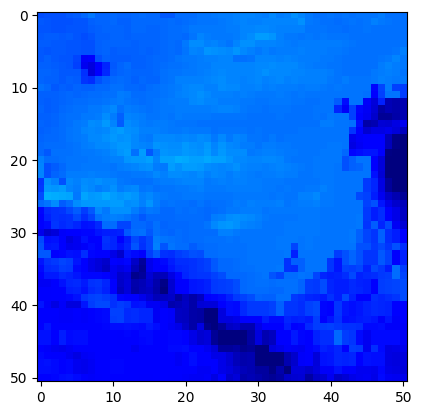

In [ ]:
# Reshape 81x81 into 51x51

y_train_reshaped = y_train_predictions[:,:,15:66, 15:66]
plt.imshow(y_train_reshaped[96,0,:,:], cmap='jet', vmin=100, vmax=610)

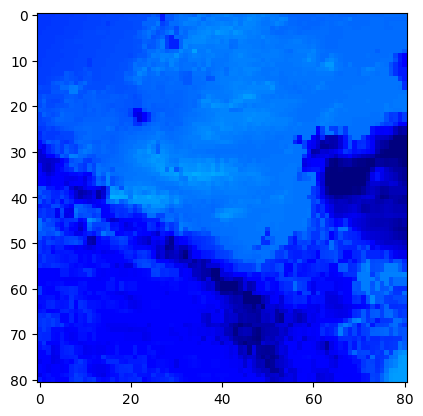

In [ ]:
# Checking pixel reshaped worked
plt.imshow(y_train_predictions[96,0,:,:], cmap='jet', vmin=100, vmax=610)

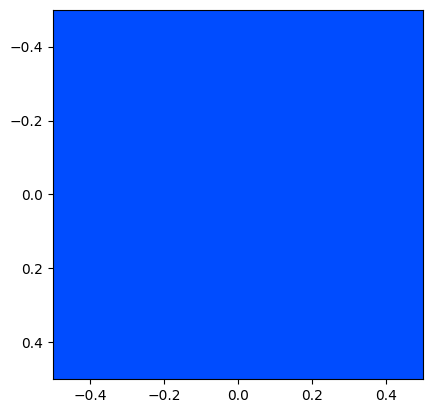

In [ ]:
# Checking pixel reshaped worked
y_train_pred_pixel = y_train_predictions[:,:,15:16, 15:16]
plt.imshow(y_train_pred_pixel[96,0,:,:], cmap='jet', vmin=100, vmax=610)

In [ ]:
y_train_pred_2D = get_2D_output(y_train_reshaped)

In [ ]:
from sklearn.metrics import mean_squared_error
 
test_score = mean_squared_error(y_train_pred_2D, y_train)
print('Baseline MSE: %.3f' % test_score)

Baseline MSE: 10601.599
